In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)
pd.set_option('max_rows', 20)

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
names = pd.read_csv('./baby-names2.csv')

In [4]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [5]:
names[names.year == 1880]

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


In [6]:
boys=names[names.sex=='boy']
girls=names[names.sex=='girl']

In [7]:
boys.groupby('year').size()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
1885    1000
1886    1000
1887    1000
1888    1000
1889    1000
        ... 
1999    1000
2000    1000
2001    1000
2002    1000
2003    1000
2004    1000
2005    1000
2006    1000
2007    1000
2008    1000
dtype: int64

In [8]:
names.groupby(['year', 'sex']).size()

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
      girl    1000
1883  boy     1000
      girl    1000
1884  boy     1000
      girl    1000
              ... 
2004  boy     1000
      girl    1000
2005  boy     1000
      girl    1000
2006  boy     1000
      girl    1000
2007  boy     1000
      girl    1000
2008  boy     1000
      girl    1000
dtype: int64

In [9]:
boys[boys.year == 2000][:5]

,year,name,prop,sex,soundex
120000,2000,Jacob,0.016514,boy,J210
120001,2000,Michael,0.015346,boy,M240
120002,2000,Matthew,0.013695,boy,M300
120003,2000,Joshua,0.013194,boy,J200
120004,2000,Christopher,0.011990,boy,C623


In [10]:
boys.ix[boys[boys.year == 2000].prop.idxmax()]

year           2000
name          Jacob
prop       0.016514
sex             boy
soundex        J210
Name: 120000, dtype: object

In [11]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]
get_max_record(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [12]:
boys.groupby('year').apply(get_max_record)

,year,name,prop,sex,soundex
year,,,,,
1880,1880,John,0.081541,boy,J500
1881,1881,John,0.080975,boy,J500
1882,1882,John,0.078314,boy,J500
1883,1883,John,0.079066,boy,J500
1884,1884,John,0.076476,boy,J500
1885,1885,John,0.075517,boy,J500
1886,1886,John,0.075820,boy,J500
1887,1887,John,0.074181,boy,J500
1888,1888,John,0.071186,boy,J500


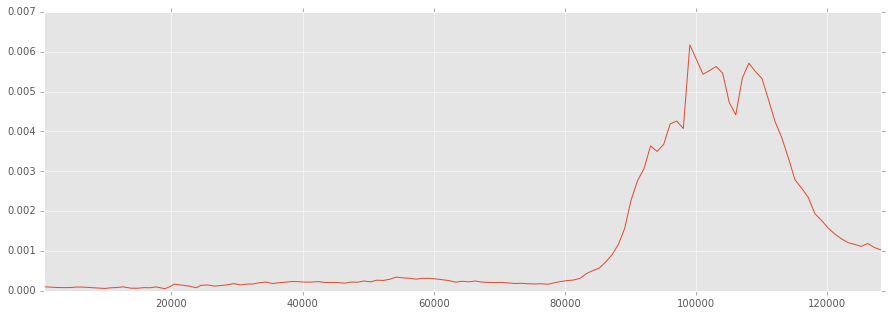

In [13]:
boys[boys.name =='Travis'].prop.plot()

In [14]:
idf = boys.set_index(['name', 'year'])

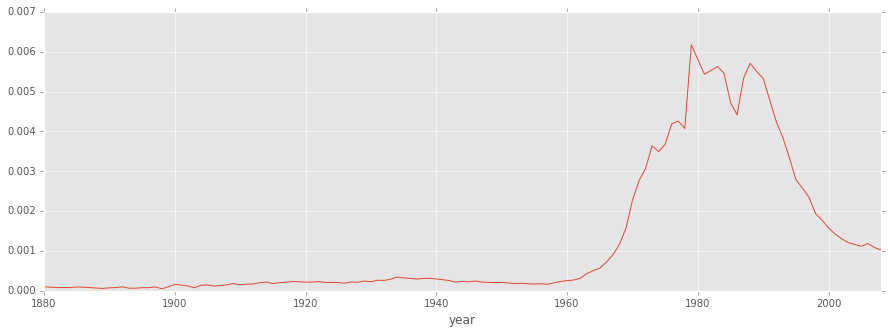

In [15]:
idf.ix['Travis'].prop.plot()

In [16]:
timeit idf.ix['Travis']

1000 loops, best of 3: 768 µs per loop


In [17]:
timeit boys[boys.name =='Travis']

100 loops, best of 3: 4.49 ms per loop


In [18]:
boys.groupby('name').prop.mean().order()

/home/seth/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


name
Kennard     0.000027
Danniel     0.000027
Deryl       0.000028
Grayling    0.000028
Michial     0.000028
Cheryl      0.000028
Dwyane      0.000028
Levern      0.000029
Theodis     0.000029
Randolf     0.000029
              ...   
Thomas      0.014739
George      0.016254
David       0.016737
Joseph      0.017771
Michael     0.018342
Charles     0.019521
Robert      0.029625
William     0.034182
James       0.035465
John        0.041082
Name: prop, dtype: float64

In [19]:
boys.describe()

,year,prop
count,129000.000000,129000.000000
mean,1944.000000,0.000916
std,37.238118,0.003441
min,1880.000000,0.000026
25%,1912.000000,0.000071
50%,1944.000000,0.000142
75%,1976.000000,0.000453
max,2008.000000,0.081541


In [20]:
result = boys.groupby('name').prop.describe()
result.head(20)

name        
Aaden  count      1.000000
       mean       0.000442
       std             NaN
       min        0.000442
       25%        0.000442
       50%        0.000442
       75%        0.000442
       max        0.000442
Aarav  count      1.000000
       mean       0.000101
       std             NaN
       min        0.000101
       25%        0.000101
       50%        0.000101
       75%        0.000101
       max        0.000101
Aaron  count    129.000000
       mean       0.002266
       std        0.002545
       min        0.000351
Name: prop, dtype: float64

In [21]:
df = boys[boys.year == 2008].sort_index(by='prop', ascending=False)
print df.prop.cumsum().searchsorted(0.5)
df.prop.cumsum()[120:130]

[127]


/home/seth/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


128120    0.489818
128121    0.491429
128122    0.493032
128123    0.494626
128124    0.496173
128125    0.497718
128126    0.499243
128127    0.500748
128128    0.502243
128129    0.503723
Name: prop, dtype: float64

In [22]:
df = boys[boys.year == 1880].sort_index(by='prop', ascending=False)
print df.prop.cumsum().searchsorted(0.5)
df.prop.cumsum()[10:20]

[15]


/home/seth/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


10    0.432588
11    0.450763
12    0.465585
13    0.479089
14    0.492340
15    0.504949
16    0.513597
17    0.520936
18    0.527929
19    0.534103
Name: prop, dtype: float64

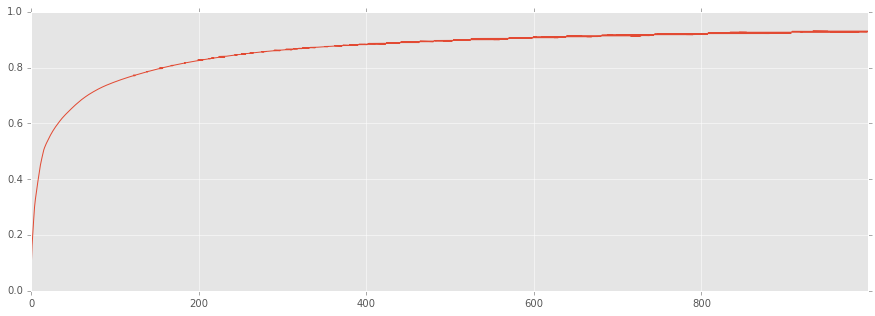

In [23]:
df.prop.cumsum().plot()


/home/seth/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


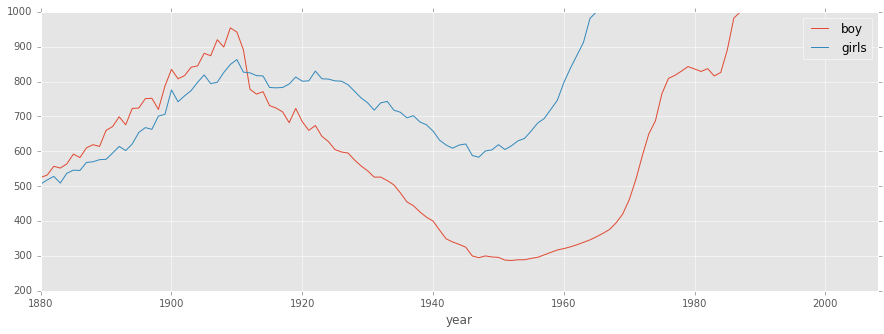

In [24]:
def get_quantile_count(group, quantile=0.5):
    df = group.sort_index(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]
q=0.9
boys.groupby('year').apply(get_quantile_count, quantile=q).plot(label='boy')
girls.groupby('year').apply(get_quantile_count, quantile=q).plot(label='girls')
plt.legend(loc='best')

In [25]:
grouped = boys.groupby('year').prop
boys['year_rank'] = grouped.transform(pd.Series.rank)
idf = boys.set_index(['name', 'year'])


/home/seth/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


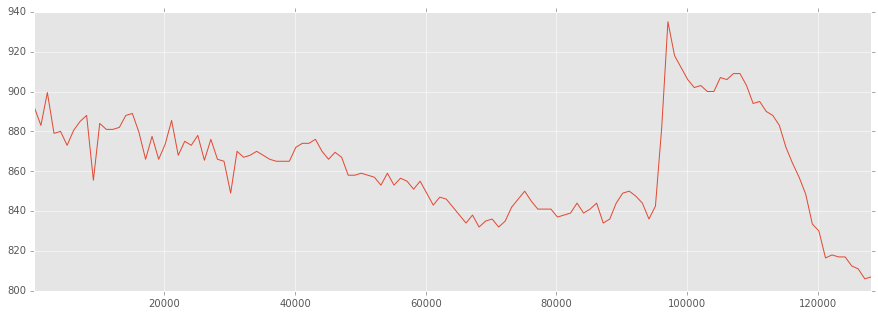

In [26]:
boys[boys.name == 'Wesley'].year_rank.plot()

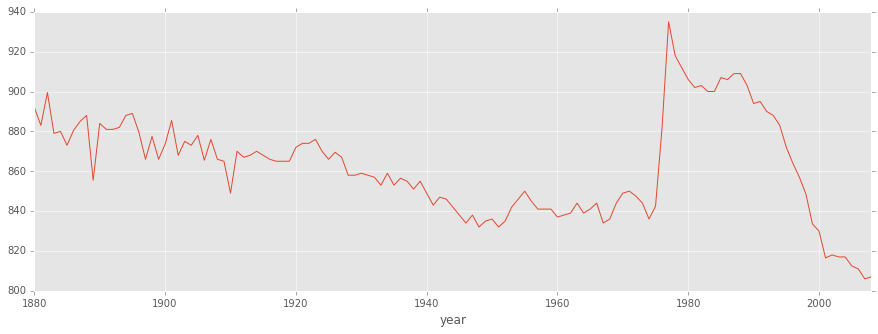

In [27]:
idf.ix['Wesley'].year_rank.plot()

In [28]:
grouped.transform(lambda x: x-x.mean())

0         0.080610
1         0.079580
2         0.049126
3         0.044236
4         0.042361
5         0.026449
6         0.021298
7         0.020470
8         0.019710
9         0.019473
            ...   
128990   -0.000705
128991   -0.000705
128992   -0.000705
128993   -0.000705
128994   -0.000705
128995   -0.000705
128996   -0.000706
128997   -0.000706
128998   -0.000706
128999   -0.000706
Name: prop, dtype: float64

In [29]:
births = pd.read_csv('./births.csv')

In [30]:
births.head()

,year,sex,births
0,1880,boy,118405
1,1881,boy,108290
2,1882,boy,122034
3,1883,boy,112487
4,1884,boy,122745


In [36]:
?pd.merge

In [38]:
pd.merge(names, births, on = ['year', 'sex'])

,year,name,prop,sex,soundex,births
0,1880,John,0.081541,boy,J500,118405
1,1880,William,0.080511,boy,W450,118405
2,1880,James,0.050057,boy,J520,118405
3,1880,Charles,0.045167,boy,C642,118405
4,1880,George,0.043292,boy,G620,118405
5,1880,Frank,0.027380,boy,F652,118405
6,1880,Joseph,0.022229,boy,J210,118405
7,1880,Thomas,0.021401,boy,T520,118405
8,1880,Henry,0.020641,boy,H560,118405
9,1880,Robert,0.020404,boy,R163,118405


In [42]:
merged = pd.merge(names, births)
merged.head()

,year,name,prop,sex,soundex,births
0,1880,John,0.081541,boy,J500,118405
1,1880,William,0.080511,boy,W450,118405
2,1880,James,0.050057,boy,J520,118405
3,1880,Charles,0.045167,boy,C642,118405
4,1880,George,0.043292,boy,G620,118405


In [44]:
merged['persons'] = np.floor(merged.prop * merged.births)
merged.head()

,year,name,prop,sex,soundex,births,persons
0,1880,John,0.081541,boy,J500,118405,9654.0
1,1880,William,0.080511,boy,W450,118405,9532.0
2,1880,James,0.050057,boy,J520,118405,5926.0
3,1880,Charles,0.045167,boy,C642,118405,5347.0
4,1880,George,0.043292,boy,G620,118405,5125.0


In [94]:
merged.groupby(['name', 'sex']).persons.sum().sort_values()

name      sex 
Alabama   girl          3.0
Daisye    girl          3.0
Crissie   girl          3.0
Dollye    girl          3.0
Dema      girl          3.0
Chestina  girl          3.0
Ala       girl          3.0
Clem      girl          3.0
Chester   girl          3.0
Eithel    girl          3.0
                    ...    
Charles   boy     2320818.0
Joseph    boy     2490274.0
Richard   boy     2535681.0
David     boy     3495940.0
William   boy     3951365.0
Mary      girl    4097626.0
Michael   boy     4207352.0
Robert    boy     4752198.0
John      boy     5016124.0
James     boy     5021269.0
Name: persons, dtype: float64

In [93]:
merged.groupby(['name']).persons.sum().sort_values()

name
Chestina          3.0
Amey              3.0
Crissie           3.0
Eithel            3.0
Alabama           3.0
Dollye            3.0
Daisye            3.0
Ala               3.0
Achsah            3.0
Dema              3.0
              ...    
Charles     2331024.0
Joseph      2498163.0
Richard     2542763.0
David       3506903.0
William     3966044.0
Mary        4111389.0
Michael     4226506.0
Robert      4771325.0
John        5036700.0
James       5043128.0
Name: persons, dtype: float64

In [84]:
len(set(merged[merged.name.isin(set(boys.name.values).intersection(girls.name.values))].name))

673

In [89]:
shared_names = set(boys.name.values).intersection(set(girls.name.values))
shared_names

{'Aaron',
 'Abbie',
 'Ada',
 'Addie',
 'Addison',
 'Adrian',
 'Agnes',
 'Akira',
 'Alba',
 'Albert',
 'Alex',
 'Alexander',
 'Alexis',
 'Alfred',
 'Ali',
 'Alice',
 'Allie',
 'Allison',
 'Allyn',
 'Alma',
 'Alpha',
 'Alta',
 'Alva',
 'Amanda',
 'Amari',
 'Amy',
 'Andra',
 'Andrea',
 'Andrew',
 'Angel',
 'Angela',
 'Ann',
 'Anna',
 'Annie',
 'Anthony',
 'Antonia',
 'Archie',
 'Ardell',
 'Arden',
 'Ariel',
 'Arley',
 'Arlie',
 'Armani',
 'Arthur',
 'Artie',
 'Ashley',
 'Ashton',
 'Atha',
 'Aubrey',
 'Audie',
 'Audrey',
 'Augusta',
 'Augustine',
 'Austin',
 'Avery',
 'Baby',
 'Bailey',
 'Barbara',
 'Beatrice',
 'Bee',
 'Bell',
 'Bennie',
 'Bernice',
 'Bert',
 'Bertha',
 'Bertie',
 'Beryl',
 'Bessie',
 'Bethel',
 'Betty',
 'Beulah',
 'Beverly',
 'Billie',
 'Billy',
 'Bird',
 'Blair',
 'Blake',
 'Blanche',
 'Bobbie',
 'Bobby',
 'Bonnie',
 'Brandon',
 'Brandy',
 'Brenda',
 'Brett',
 'Brian',
 'Britt',
 'Brittany',
 'Brook',
 'Burnice',
 'Byrd',
 'Callie',
 'Cameron',
 'Camille',
 'Campbell',

In [82]:
'Glenn' in set(girls.name.values)

True

In [88]:
girls[(girls.name=='Glenn')]

,year,name,prop,sex,soundex
129867,1880,Glenn,0.000051,girl,G450
130870,1881,Glenn,0.000051,girl,G450
132969,1883,Glenn,0.000042,girl,G450
133963,1884,Glenn,0.000044,girl,G450
134764,1885,Glenn,0.000063,girl,G450
137985,1888,Glenn,0.000042,girl,G450
139845,1890,Glenn,0.000055,girl,G450
140813,1891,Glenn,0.000061,girl,G450
141929,1892,Glenn,0.000049,girl,G450
144646,1895,Glenn,0.000093,girl,G450


In [95]:
merged[merged.name.isin(shared_names)].groupby(['name']).prop.sum().sort_values()

name
Ozell       0.000086
Elgie       0.000096
Clemence    0.000170
Luverne     0.000187
Mell        0.000231
Halley      0.000238
Jensen      0.000265
Michal      0.000273
Ozie        0.000374
Burnice     0.000407
              ...   
George      2.107293
David       2.165669
Joseph      2.299793
Michael     2.376937
Charles     2.528625
Robert      3.836721
William     4.424557
Mary        4.534115
James       4.593850
John        5.320360
Name: prop, dtype: float64

In [91]:
girls[(girls.name=='James')]

,year,name,prop,sex,soundex
129343,1880,James,0.000225,girl,J520
130329,1881,James,0.000243,girl,J520
131437,1882,James,0.000156,girl,J520
132366,1883,James,0.000208,girl,J520
133342,1884,James,0.000240,girl,J520
134407,1885,James,0.000183,girl,J520
135402,1886,James,0.000189,girl,J520
136517,1887,James,0.000122,girl,J520
137358,1888,James,0.000238,girl,J520
138491,1889,James,0.000137,girl,J520


In [50]:
merged.this=4 # adds object attribute not column of 4's
merged.this

4

In [98]:
mboys = pd.merge(boys, births)
mboys['persons'] = np.floor(mboys.prop * mboys.births)
persons = mboys.set_index(['year', 'name']).persons
persons

year  name    
1880  John        9654.0
      William     9532.0
      James       5926.0
      Charles     5347.0
      George      5125.0
      Frank       3241.0
      Joseph      2632.0
      Thomas      2533.0
      Henry       2443.0
      Robert      2415.0
                   ...  
2008  Baron        195.0
      Carlo        195.0
      Carsen       195.0
      Fletcher     195.0
      Izayah       195.0
      Kolten       195.0
      Damari       193.0
      Hugh         193.0
      Jensen       193.0
      Yurem        193.0
Name: persons, dtype: float64

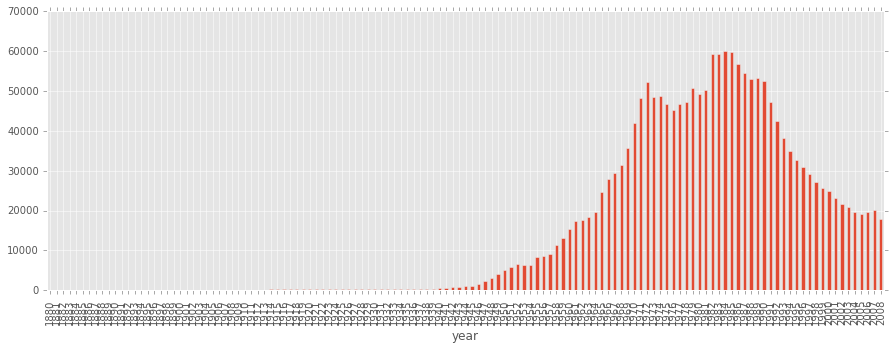

In [99]:
persons.ix[:, "Christopher"].plot(kind='bar', rot=90)

In [105]:
persons.unstack('name')

name,Aaden,Aarav,Aaron,Ab,Abb,Abbie,Abbott,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abie,Abner,Abraham,Abram,Ace,Acey,Acie,Acy,Ada,Adalberto,Adam,Adams,Adan,Add,Addie,Addison,Adelard,...,Yoshio,Young,Yurem,Yusuf,Zachariah,Zachary,Zachery,Zack,Zackary,Zackery,Zaid,Zaiden,Zain,Zaire,Zakary,Zander,Zane,Zavier,Zayden,Zayne,Zeb,Zebulon,Zechariah,Zed,Zeke,Zenas,Zeno,Zigmund,Zion,Zollie
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,101.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,49.0,8.0,NaN,NaN,26.0,80.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,8.0,18.0,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,93.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,12.0,NaN,NaN,29.0,85.0,29.0,NaN,NaN,5.0,NaN,NaN,NaN,115.0,NaN,NaN,4.0,7.0,17.0,4.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,85.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,NaN,NaN,31.0,91.0,25.0,8.0,NaN,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,5.0,20.0,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,12.0,NaN,NaN,26.0,51.0,20.0,5.0,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,6.0,20.0,NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
1884,NaN,NaN,96.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,45.0,13.0,NaN,NaN,33.0,67.0,28.0,5.0,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,7.0,16.0,6.0,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1885,NaN,NaN,88.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,46.0,6.0,NaN,NaN,32.0,86.0,17.0,NaN,NaN,NaN,NaN,4.0,NaN,96.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.0
1886,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,15.0,NaN,NaN,17.0,77.0,17.0,9.0,4.0,NaN,NaN,5.0,NaN,102.0,NaN,NaN,NaN,7.0,15.0,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,NaN,NaN,78.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,36.0,11.0,NaN,NaN,18.0,74.0,19.0,7.0,NaN,NaN,NaN,5.0,NaN,83.0,NaN,NaN,NaN,6.0,12.0,NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,90.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,45.0,8.0,NaN,NaN,24.0,77.0,25.0,11.0,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


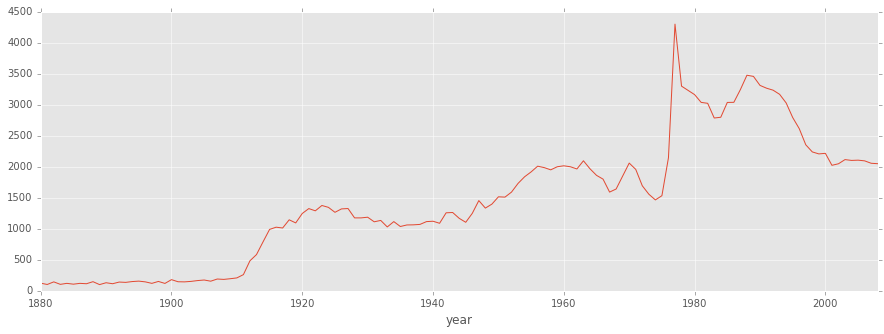

In [106]:
previous_result= _ # _ is the previous result without recalculating
previous_result['Wesley'].plot()